# Unsupervised Learning: Clustering

In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.

In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,-7.731396,1.872426
1,-6.271432,-9.026423
2,0.303600,-2.363221
3,2.289281,-0.669149
4,-5.307246,1.248633


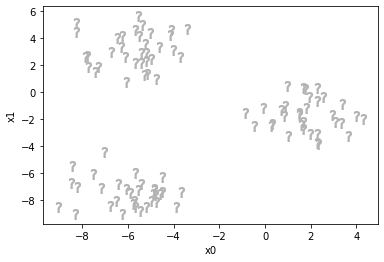

In [3]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

# Hard Problem

Finding the best answer.

# Easier Problem

Taking a bad answer and make it a little better.  Then repeat!

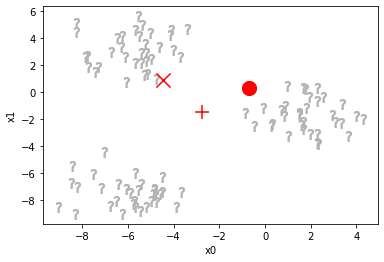

In [43]:
clusters = np.random.uniform(-5, 5, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [44]:
clusters

,x0,x1,label
0,-0.718562,0.297587,o
1,-2.748732,-1.464335,+
2,-4.485340,0.913812,x


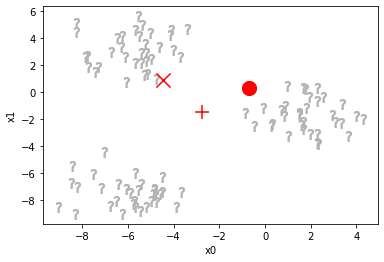

In [45]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = list(self.clusters["label"])
        
    def plot(self):
        ax = km_scatter(self.df, s=100, c="0.7")
        km_scatter(self.clusters, s=200, c="red", ax=ax)
        
    # centroids => points (df)
    def assign_points(self):
        for cluster in self.clusters.itertuples():
            x0_diff = df["x0"] - cluster.x0
            x1_diff = df["x1"] - cluster.x1
            dist = (x0_diff**2 + x1_diff**2) ** 0.5
            self.df[cluster.label] = dist
        self.df["label"] = km.df[km.labels].idxmin(axis=1)
        return self
    
    # centroids => points
    def update_centers(self):
        clusters = km.df.groupby("label").mean()
        self.clusters = clusters[["x0", "x1"]].reset_index()
        return self
        
km = KM(df, clusters)
km.plot()

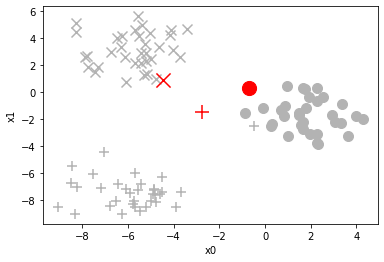

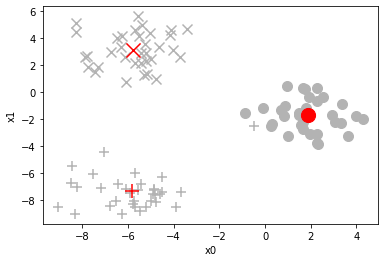

In [46]:
km.assign_points().plot()
km.update_centers().plot()

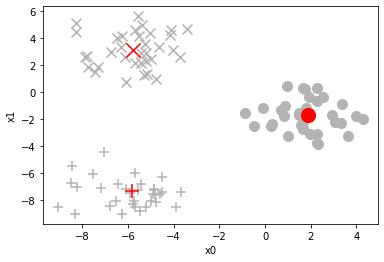

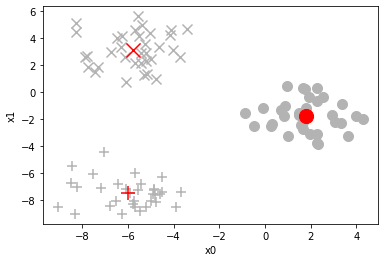

In [47]:
km.assign_points().plot()
km.update_centers().plot()

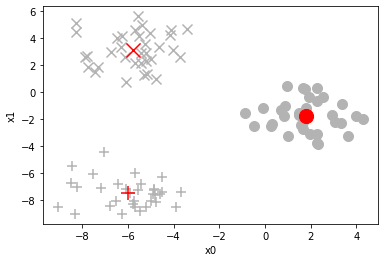

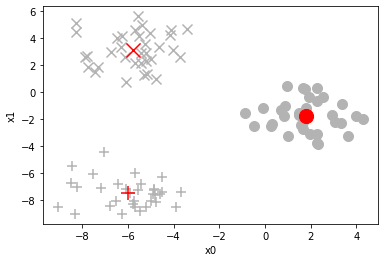

In [48]:
km.assign_points().plot()
km.update_centers().plot()